# Provided Models

Damuta provides several latent variable models for proabilistic mutational signature analysis. Instantiated models can be visualized with [graphviz](https://graphviz.org/).

In [1]:
import pymc3 as pm
import pandas as pd
import damuta as da
from damuta.models import Lda, TandemLda, HierarchicalTandemLda

# Load data
counts = pd.read_csv('example_data/pcawg_counts.csv', index_col=0)
annotation = pd.read_csv('example_data/pcawg_cancer_types.csv', index_col=0)
pcawg = da.DataSet(counts, annotation)

<Figure size 432x288 with 0 Axes>


## Vanilla LDA

Plain 'ol LDA

Only infers COSMIC-format 96-dimensional mutational signatures 

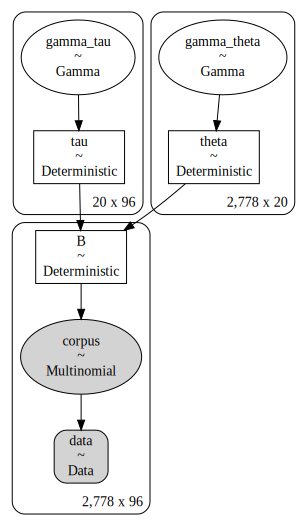

In [2]:
lda = Lda(pcawg, n_sigs = 20)
lda._build_model(**lda._model_kwargs)
pm.model_graph.model_to_graphviz(lda.model)

## Tandem LDA

Two layers of LDA
Infers activities for damage and repair signatures

Can be initialised with classic 96-dimensional mutational signatures 


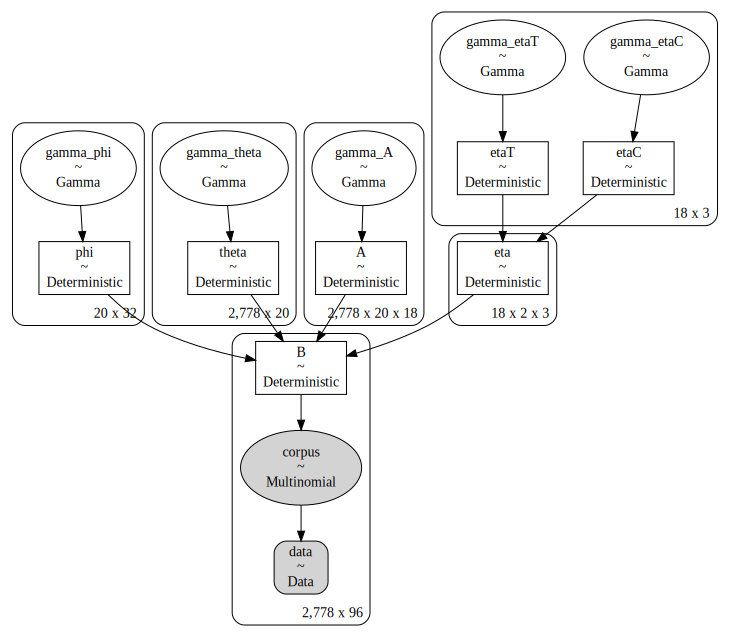

In [4]:
t_lda = TandemLda(pcawg, n_damage_sigs = 20, n_misrepair_sigs=18)
t_lda._build_model(**t_lda._model_kwargs)
pm.model_graph.model_to_graphviz(t_lda.model)


## Hierarchical Tandem LDA

The full Hierarchical Tandem LDA model is similar to the Tandem LDA model, with an added hirearchical proir to incorporate tissue-specific information. 

Infers activities for damage and repair signatures

Can be initialised with classic 96-dimensional mutational signatures 

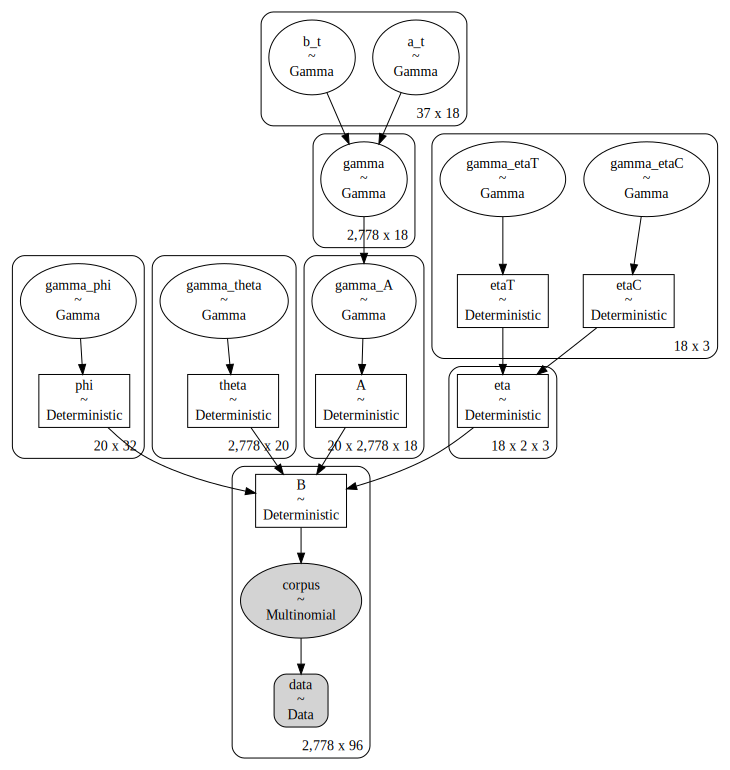

In [5]:
ht_lda = HierarchicalTandemLda(pcawg, type_col="tissue_type",
                               n_damage_sigs = 20, n_misrepair_sigs=18)
ht_lda._build_model(**ht_lda._model_kwargs)
pm.model_graph.model_to_graphviz(ht_lda.model)